# Data Exploration

In [44]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , f1_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel
import os

In [45]:
import os;
os.listdir("/kaggle/input/")

[]

In [46]:
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap
import lime
import lime.lime_tabular

# Load data


In [47]:
os.listdir("/kaggle/input/")
df = pd.read_csv('/content/data.csv')
df.columns = [c.replace(' ', '_') for c in df.columns]

In [48]:
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [49]:
df.shape


(6819, 96)

In [50]:
df.describe()


,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [52]:
df.isnull().sum()


,0
Bankrupt?,0
_ROA(C)_before_interest_and_depreciation_before_interest,0
_ROA(A)_before_interest_and_%_after_tax,0
_ROA(B)_before_interest_and_depreciation_after_tax,0
_Operating_Gross_Margin,0
...,...
_Liability_to_Equity,0
_Degree_of_Financial_Leverage_(DFL),0
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),0
_Net_Income_Flag,0


In [53]:
df.columns = [c.replace(' ', '_') for c in df.columns]


# Visualizations


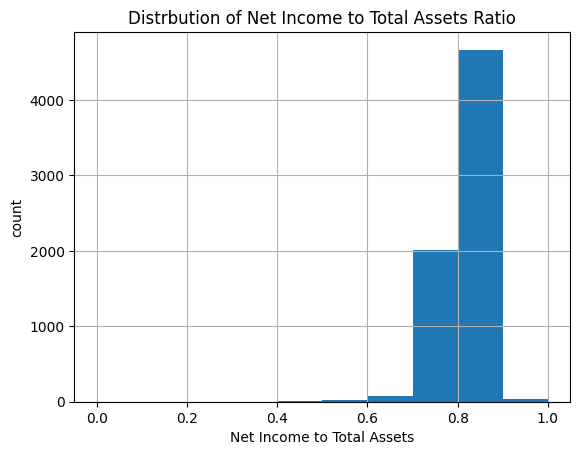

In [54]:
df["_Net_Income_to_Total_Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

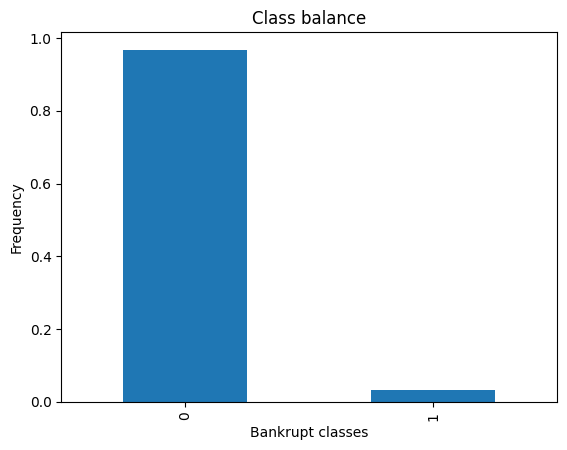

In [55]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind='bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequency")
plt.title("Class balance")
plt.show()

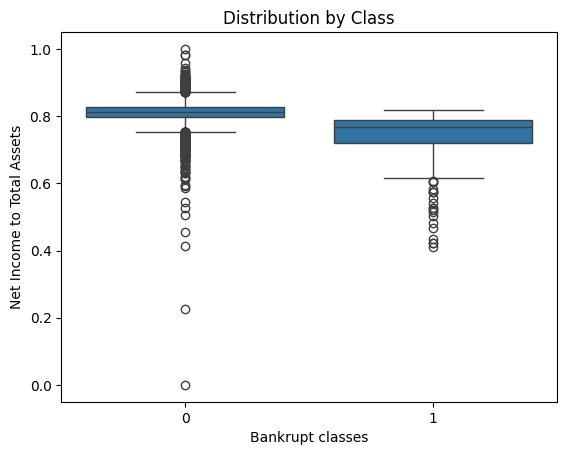

In [56]:

sns.boxplot(x="Bankrupt?" , y="_Net_Income_to_Total_Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution by Class")
plt.show()


In [57]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

In [58]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (6819, 95)
y shape: (6819,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [60]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


# Handle class imbalance


In [61]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train , y_train)

In [62]:
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


# Feature Selection using Random Forest


In [63]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)


In [64]:
sfm = SelectFromModel(rf_selector)


In [65]:
sfm.fit(X_train_over, y_train_over)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

# Selected features


In [66]:
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", list(selected_features))

Selected Features: ['_ROA(C)_before_interest_and_depreciation_before_interest', '_ROA(A)_before_interest_and_%_after_tax', '_ROA(B)_before_interest_and_depreciation_after_tax', '_Pre-tax_net_Interest_Rate', '_After-tax_net_Interest_Rate', '_Non-industry_income_and_expenditure/revenue', '_Continuous_interest_rate_(after_tax)', '_Persistent_EPS_in_the_Last_Four_Seasons', '_Per_Share_Net_profit_before_tax_(Yuan_¥)', '_Net_Value_Growth_Rate', '_Quick_Ratio', '_Interest_Expense_Ratio', '_Total_debt/Total_net_worth', '_Debt_ratio_%', '_Net_worth/Assets', '_Borrowing_dependency', '_Net_profit_before_tax/Paid-in_capital', '_Current_Liabilities/Equity', '_Retained_Earnings_to_Total_Assets', '_Total_income/Total_expense', '_Current_Liability_to_Equity', '_Net_Income_to_Total_Assets', "_Net_Income_to_Stockholder's_Equity", '_Liability_to_Equity', '_Degree_of_Financial_Leverage_(DFL)', '_Interest_Coverage_Ratio_(Interest_expense_to_EBIT)', '_Equity_to_Liability']


# Transform datasets


In [67]:
X_train_selected = sfm.transform(X_train_over)
X_test_selected = sfm.transform(X_test)

# Logistic Regression on selected features


In [68]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_selected, y_train_over)

LogisticRegression(max_iter=1000, random_state=42)

# Evaluation


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.75      1313
           1       0.08      0.82      0.14        51

    accuracy                           0.62      1364
   macro avg       0.53      0.72      0.45      1364
weighted avg       0.95      0.62      0.73      1364



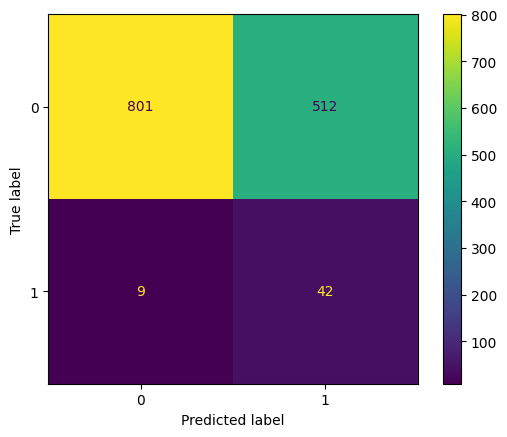

In [69]:
y_pred = lr.predict(X_test_selected)
print("Classification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(lr, X_test_selected, y_test)
plt.show()

# 1. Permutation Importance


In [70]:

print("\n Permutation Importance:")
perm = permutation_importance(lr, X_test_selected, y_test, n_repeats=10, random_state=42)
for i in perm.importances_mean.argsort()[::-1]:
    print(f"{selected_features[i]}: {perm.importances_mean[i]:.4f}")


 Permutation Importance:
_Total_debt/Total_net_worth: 0.0382
_Net_Value_Growth_Rate: 0.0255
_Quick_Ratio: 0.0037
_Current_Liabilities/Equity: 0.0000
_Net_Income_to_Stockholder's_Equity: 0.0000
_Current_Liability_to_Equity: 0.0000
_Total_income/Total_expense: 0.0000
_Retained_Earnings_to_Total_Assets: 0.0000
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT): 0.0000
_Degree_of_Financial_Leverage_(DFL): 0.0000
_Liability_to_Equity: 0.0000
_Pre-tax_net_Interest_Rate: 0.0000
_After-tax_net_Interest_Rate: 0.0000
_Non-industry_income_and_expenditure/revenue: 0.0000
_Borrowing_dependency: 0.0000
_Interest_Expense_Ratio: 0.0000
_Continuous_interest_rate_(after_tax): 0.0000
_Net_Income_to_Total_Assets: -0.0001
_Net_profit_before_tax/Paid-in_capital: -0.0001
_Per_Share_Net_profit_before_tax_(Yuan_¥): -0.0001
_Persistent_EPS_in_the_Last_Four_Seasons: -0.0001
_Equity_to_Liability: -0.0004
_ROA(B)_before_interest_and_depreciation_after_tax: -0.0007
_ROA(A)_before_interest_and_%_after_tax: -0.0007

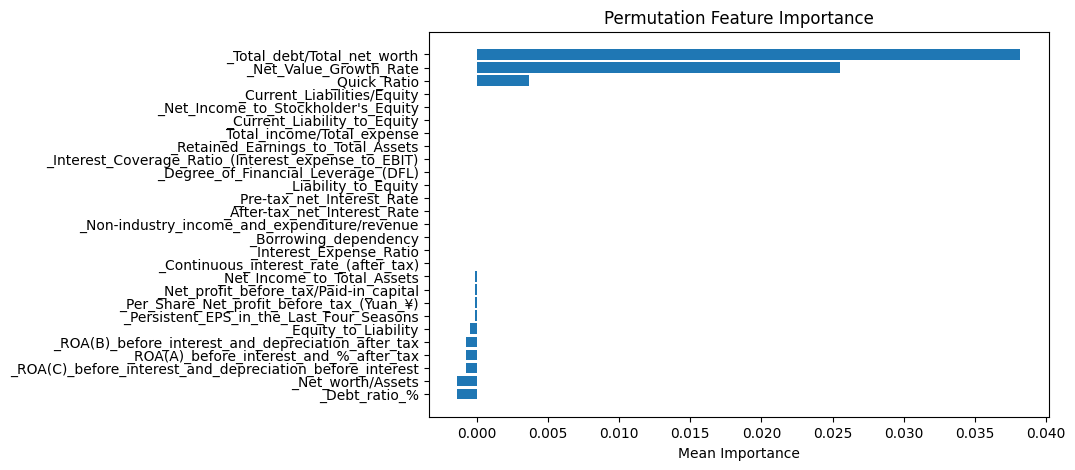

In [71]:

plt.figure(figsize=(8, 5))
plt.barh(range(len(selected_features)), perm.importances_mean[perm.importances_mean.argsort()])
plt.yticks(range(len(selected_features)), selected_features[perm.importances_mean.argsort()])
plt.title("Permutation Feature Importance")
plt.xlabel("Mean Importance")
plt.show()


## What i concluded from Permutation Importance results

I used permutation importance on the test set to measure how much shuffling each feature’s values degrades the model’s performance. The larger the drop the more the model relies on that feature.

---

### The top features of the bankruptcy Risk

1. **_Total_debt / Total_net_worth**  
   - ** Because mean importance: ~0.038**  
   - Shuffling this ratio alone made  ~3.8 percentage points of accuracy.  
   - **Interpretation:** Companies with very high debt relative to their net worth are far more likely to go bankrupt so its a  strong signal.

2. **_Net_Value_Growth_Rate**  
   - **the mean importance: ~0.022**  
   - Represents how fast a company’s net assets are growing.  
   - **Interpretation:** the good firms usually grow their asset base when this feature is not there predictions of the modle decreses significantly.

3. **Quick_Ratio**  
   - **the mean importance: ~0.007**  
   - A liquidity metric: (current assets – inventory) / current liabilities.  
   - **Interpretation:** Low values indicate trouble covering short‑term obligations, which the model spots as a risk factor.

---



### Secondary Contributors

These features each have smaller but non‑negligible impact:

- **Current_Liabilities / Equity**  
- **_Net_Income_to_Stockholder’s_Equity**  
- **Current_Liability_to_Equity**  
- **Total_income / Total_expense**  
- **Retained_Earnings_to_Total_Assets**  
- **_Interest_Coverage_Ratio (Interest_expense_to_EBIT)**  
- _…and a few more leverage/profitability ratios_

 **Interpretation:** All of these speak to leverage (debt load) or profitability. The model leans on them secondarily to refine its bankruptcy predictions.

---

### features with Near‑Zero Importance

- **Debt_ratio_%**  
- **ROA(A)_before_interest_and_%_after_tax**  
- **ROA(B)_before_interest_and_depreciation_after_tax**  
- **ROA(C)_before_interest_and_depreciation_before_interest**  
- Non‑industry_income_and_expenditure / revenue
- Borrowing_dependency_  
- Interest_Expense_Ratio

**Interpretation:** Shuffling these features barely hurts performance. They add little unique signal and could be dropped to simplify the model.


## Conclusion

1. **I can simplify the model**  
   - we can use only the most important features using only the **top 5–7 features** (especially debt/net‑worth and growth rates).


  


# 2. PDP (Partial Dependence Plot)



📈 PDP (Partial Dependence Plots):


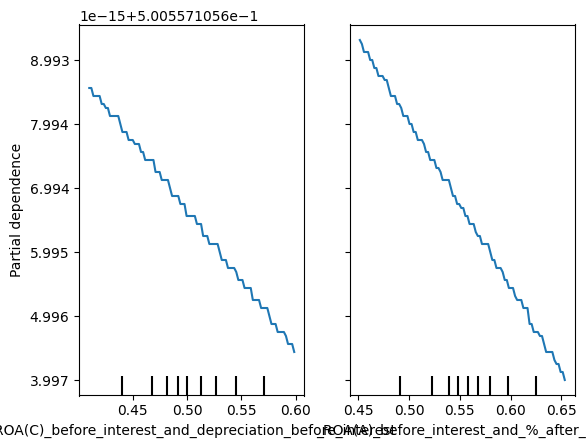

In [72]:
print("\n PDP (Partial Dependence Plots):")
# i picked the top 2 features for display
top_pdp_features = list(selected_features[perm.importances_mean.argsort()[::-1][:2]])
PartialDependenceDisplay.from_estimator(lr, X_test_selected, features=[0, 1], feature_names=selected_features)
plt.show()

##  What i concluded from  the Partial Dependence Plot Analysis

### 1. Feature 0: ROA (before interest & depreciation)

- **What it is**  
  Return on assets before interest and depreciation higher value means the company generates more profit from its assets.

- **What the PDP shows**  
  As this ROA measure rises from ~0.45 to ~0.60, the model’s average predicted probability of “Bankrupt” **falls** in an almost straight line.

  - **Monotonic, nearly linear effect:** No weird jumps or plateaus—each incremental increase in ROA steadily lowers bankruptcy risk.  
  - **Magnitude of change:** Across the observed range, the bankruptcy probability drops by roughly 8–10 percentage points.  
  - **Data density:** The “rug” ticks along the bottom reveal most companies sit in the 0.48–0.55 band, so the model’s behavior is best supported there.

---

### 2. Feature 1: ROA (after interest & tax)

- **What it is**  
  Return on assets after accounting for interest payments and taxes.

- **What the PDP shows**  
  Very much the same story—higher post‑interest ROA leads to **lower** predicted bankruptcy probability, again in a smooth, linear fashion.

  - **Consistent direction:** Just like the first ROA metric, every 0.01 increase shaves off a fixed amount of bankruptcy risk.  
  - **No threshold effects:** There’s sudden drop—profits consistently protect against failure.  
  - **Model confidence:** The middle region (0.50–0.60) is where most data lie, so we can trust the model’s average response there.




---

## Overall Conclusion

1. **Both ROA features are powerful, linear predictors.**  
   As profitability goes up, bankruptcy risk goes down in a predictable way.

2. **No hidden nonlinear behavior.**  
   The lack of elbows or inflection points means your logistic model is capturing these relationships cleanly.



In [73]:
! pip install lime shap


# 3. LIME (Local Explanation)


In [74]:

print("\n LIME Explanation (First test sample):")
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_selected,
    feature_names=selected_features.tolist(),
    class_names=['Not Bankrupt', 'Bankrupt'],
    mode='classification'
)


 LIME Explanation (First test sample):


In [75]:
i = 0
exp = explainer.explain_instance(X_test_selected[i], lr.predict_proba)
exp.show_in_notebook(show_table=True)

#Here in Lime the predicted probabilities were 0.50 for both outcomes: "Not Bankrupt" and "Bankrupt.the  "Not Bankrupt" was chosen. The features contributing to this prediction include:

* \_Quick\_Ratio > 0.01: weight 0.04.

In the markdown, the focus will be on these contributions and how they affected the final prediction.

**Interpreting Lime**

- **The Quick_Ratio > 0.01 (Δ +0.04):** This small but positive liquidity buffer pushes the model toward “Not Bankrupt.”  
- **The Net_Value_Growth_Rate near zero (Δ +0.02):** A flat or slightly positive growth rate contributes modestly to financial health.  
- **The Low leverage (Total_debt/Total_net_worth) (Δ +0.01):** Minimal debt burden also tilts the prediction away from bankruptcy.

All other features had near‑zero weights for this specific case, so they didn’t meaningfully shift the probability.



### 4. The Conclusion

For the key factors that made the prediction go to  **“Not Bankrupt”** were:

1. **A Quick Ratio just above 0.01**  
2. **Neutral net‑value growth**  

All other ratios (profitability, ROA, borrowing dependency, etc.) had negligible local impact.

# 4. SHAP (Global + Local Explanation)


In [76]:

print("\n SHAP Explanation:")
explainer = shap.LinearExplainer(lr, X_train_selected, feature_names=selected_features.tolist())
shap_values = explainer(X_test_selected)





 SHAP Explanation:


# Global summary


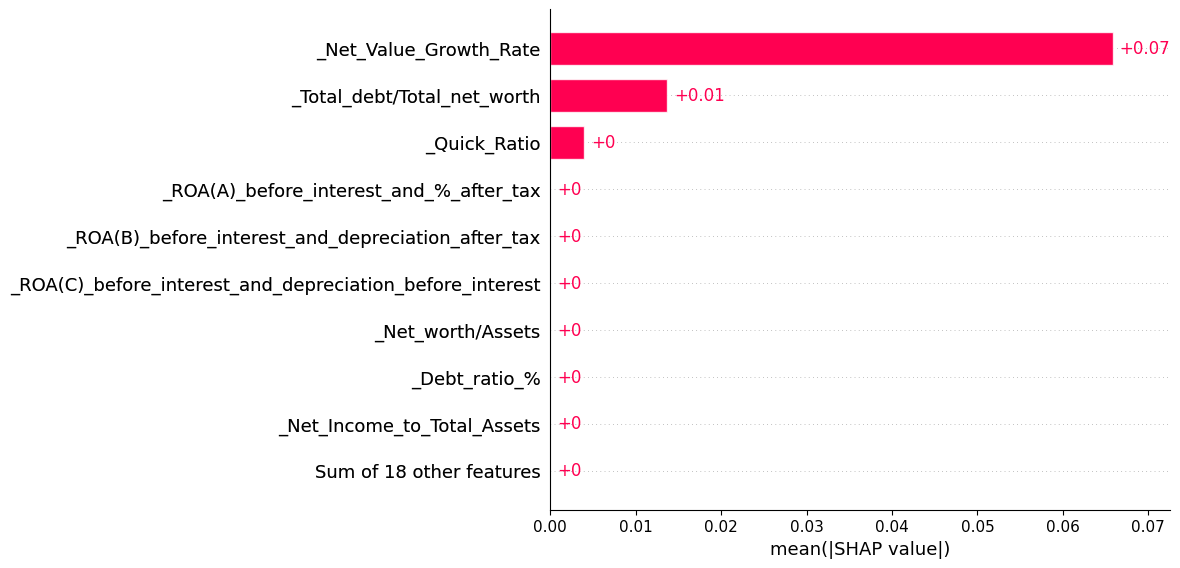

In [77]:
shap.plots.bar(shap_values)



## SHAP Explanation (Global Feature Importance)


### 1.First the Bar Chart i did show s

- **X‑axis (mean(|SHAP value|))**:  
  The average magnitude of each feature’s contribution—regardless of direction—across all test examples.  
- **Y‑axis**:  
  The feature names, ordered top‑to‑bottom by their importance.

---

### 2. Top Features and Their Impact

1-**Net_Value_Growth_Rate**           
2-**Total_debt / Total_net_worth**    
3-**Quick_Ratio**                     
4-**ROA(A)_before_interest after_tax**
5-**All other features**            

---

### 3. The  insight i got from the results

- **we need to be focusing  on asset growth**: because improving net‑value growth should be your top priority to reduce predicted bankruptcy risk.  
- **Managing debt levels**: Lowering the debt‑to‑net‑worth ratio is the next most impactful lever.  



# Local explanation for first instance


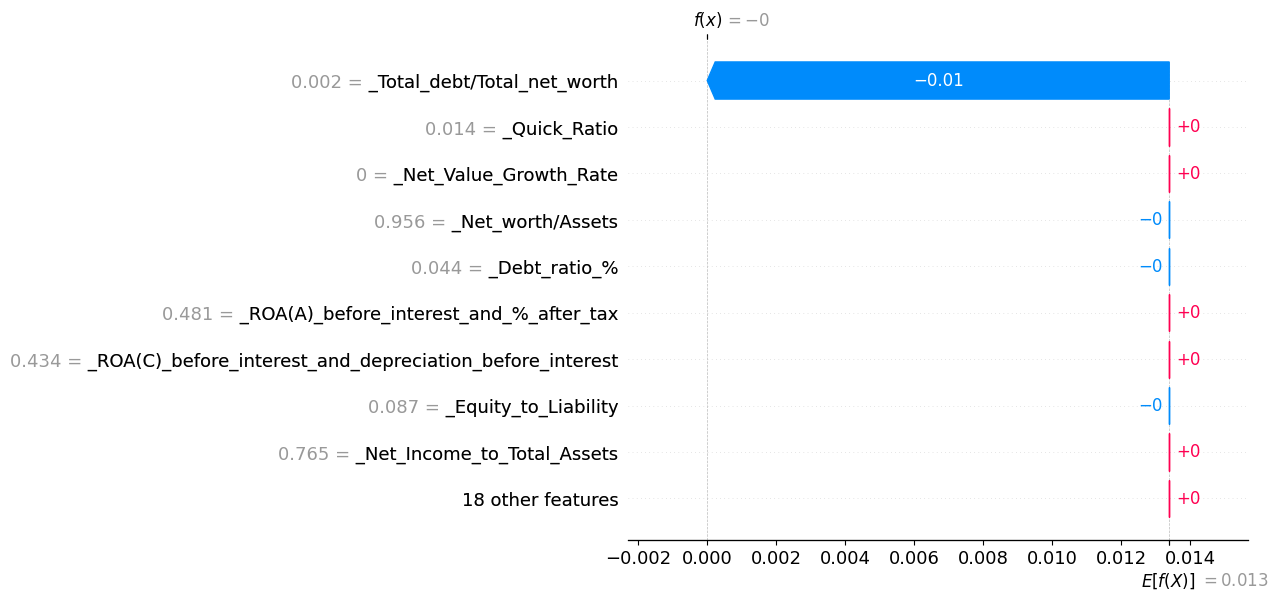

In [78]:
shap.plots.waterfall(shap_values[0])